### **Import Modules**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

### **Load Dataset**

In [29]:
df = pd.read_csv('../Dataset/Student Dataset(features=20).csv')
df.head(10)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

### **Visualization**

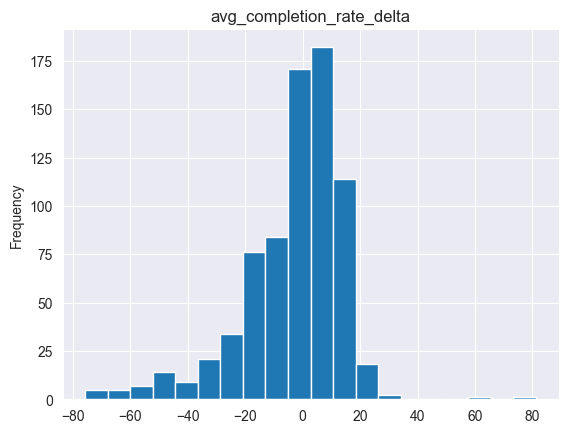

In [30]:
# @title avg_completion_rate_delta

from matplotlib import pyplot as plt
df['avg_completion_rate_delta'].plot(kind='hist', bins=20, title='avg_completion_rate_delta')
plt.gca().spines[['top', 'right',]].set_visible(False)

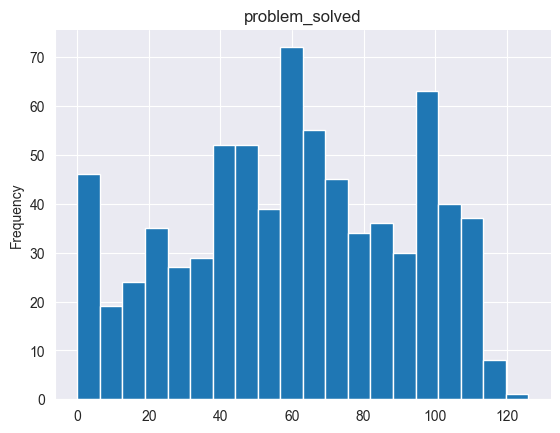

In [31]:
# @title problem_solved

from matplotlib import pyplot as plt
df['problem_solved'].plot(kind='hist', bins=20, title='problem_solved')
plt.gca().spines[['top', 'right',]].set_visible(False)

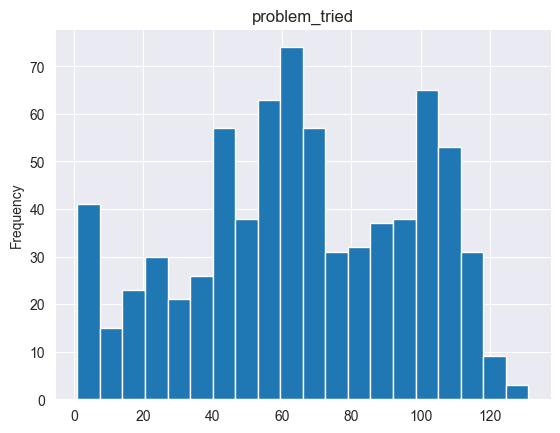

In [32]:
# @title problem_tried

from matplotlib import pyplot as plt
df['problem_tried'].plot(kind='hist', bins=20, title='problem_tried')
plt.gca().spines[['top', 'right',]].set_visible(False)

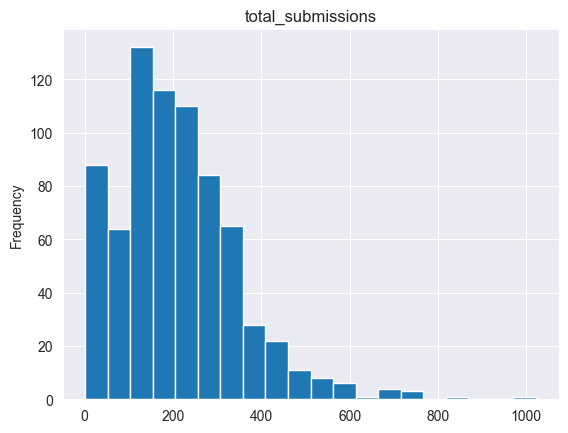

In [33]:
# @title total_submissions

from matplotlib import pyplot as plt
df['total_submissions'].plot(kind='hist', bins=20, title='total_submissions')
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Selecting features and target**

In [34]:
features = ['total_submissions','problem_tried', 'problem_solved', 'avg_completion_rate_delta', 'avg_inverse_solving_rate', 'avg_submissions_per_day', 'activity_span','percentage_submissions_night_hours','percentage_submissions_study_hours','submission_hour_variance','submission_efficiency','avg_attempts_per_problem','active_days','active_ratio','avg_assignment_score','assignment_score_variance','weekend_submission_ratio','focus_index','problem_solved_rate','assignment_completion_rate']



target = ['qt']

X = df[features]
y = df[target]

### **Normalize**

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Split Data**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size=0.2, random_state=42)

### **Define a Random Forest model (Sklearn)**

In [37]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
model = MultiOutputRegressor(rf)

### **Training**

In [38]:
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

### **Evaluate**

In [39]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Test MSE: {mse:.4f}")

Random Forest Test MSE: 3.1529


### **Predict**

In [40]:
input_df = pd.read_csv('../Input - Output/input(features=20).csv')
X_input = input_df[features]
X_input_scaled = scaler.transform(X_input)

predictions_np = model.predict(X_input_scaled)

input_df['predicted_qt'] = predictions_np

csv_file_path = '../Input - Output/Output.csv'
input_df.to_csv(csv_file_path, index=False)
print("Predicted qt result added to Output.csv.")


Predicted qt result added to output.csv.
